In [1]:
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


***STEP***

ANALISE DESCRITIVA:
- Analise dos dados, como estão distribuidos, quais são os tipos de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


**Conclusão**

Temos um base de 4269 clientes com informações pessoais e financeiras distribuidos em 12 colunas, sendo *loan_status* a coluna target, nessa analise descritiva, notamos que nao tem dados faltantes e os tipos de dados estão corretos, analisamos tambem que as colunas possuem um desvio padrao baixo em relação a meta, indicando que as classes estão balanceadas, verificamos que a coluna *residential_assets_value* tem valores negativos, por se tratar de valores ativos de imoveis não faz muito sentido, nos fazendo concluir que temos possiveis outliers a ser tratados. As colunas com execeção do ID do cliente estão com um espaço antes do nome e por fim as colunas tem ordens de grandezas diferentes entre si, isso pode interferir no modelo nos remetendo a uma normalização dos dados.


**STEP**

ANALISE EXPORATORIA

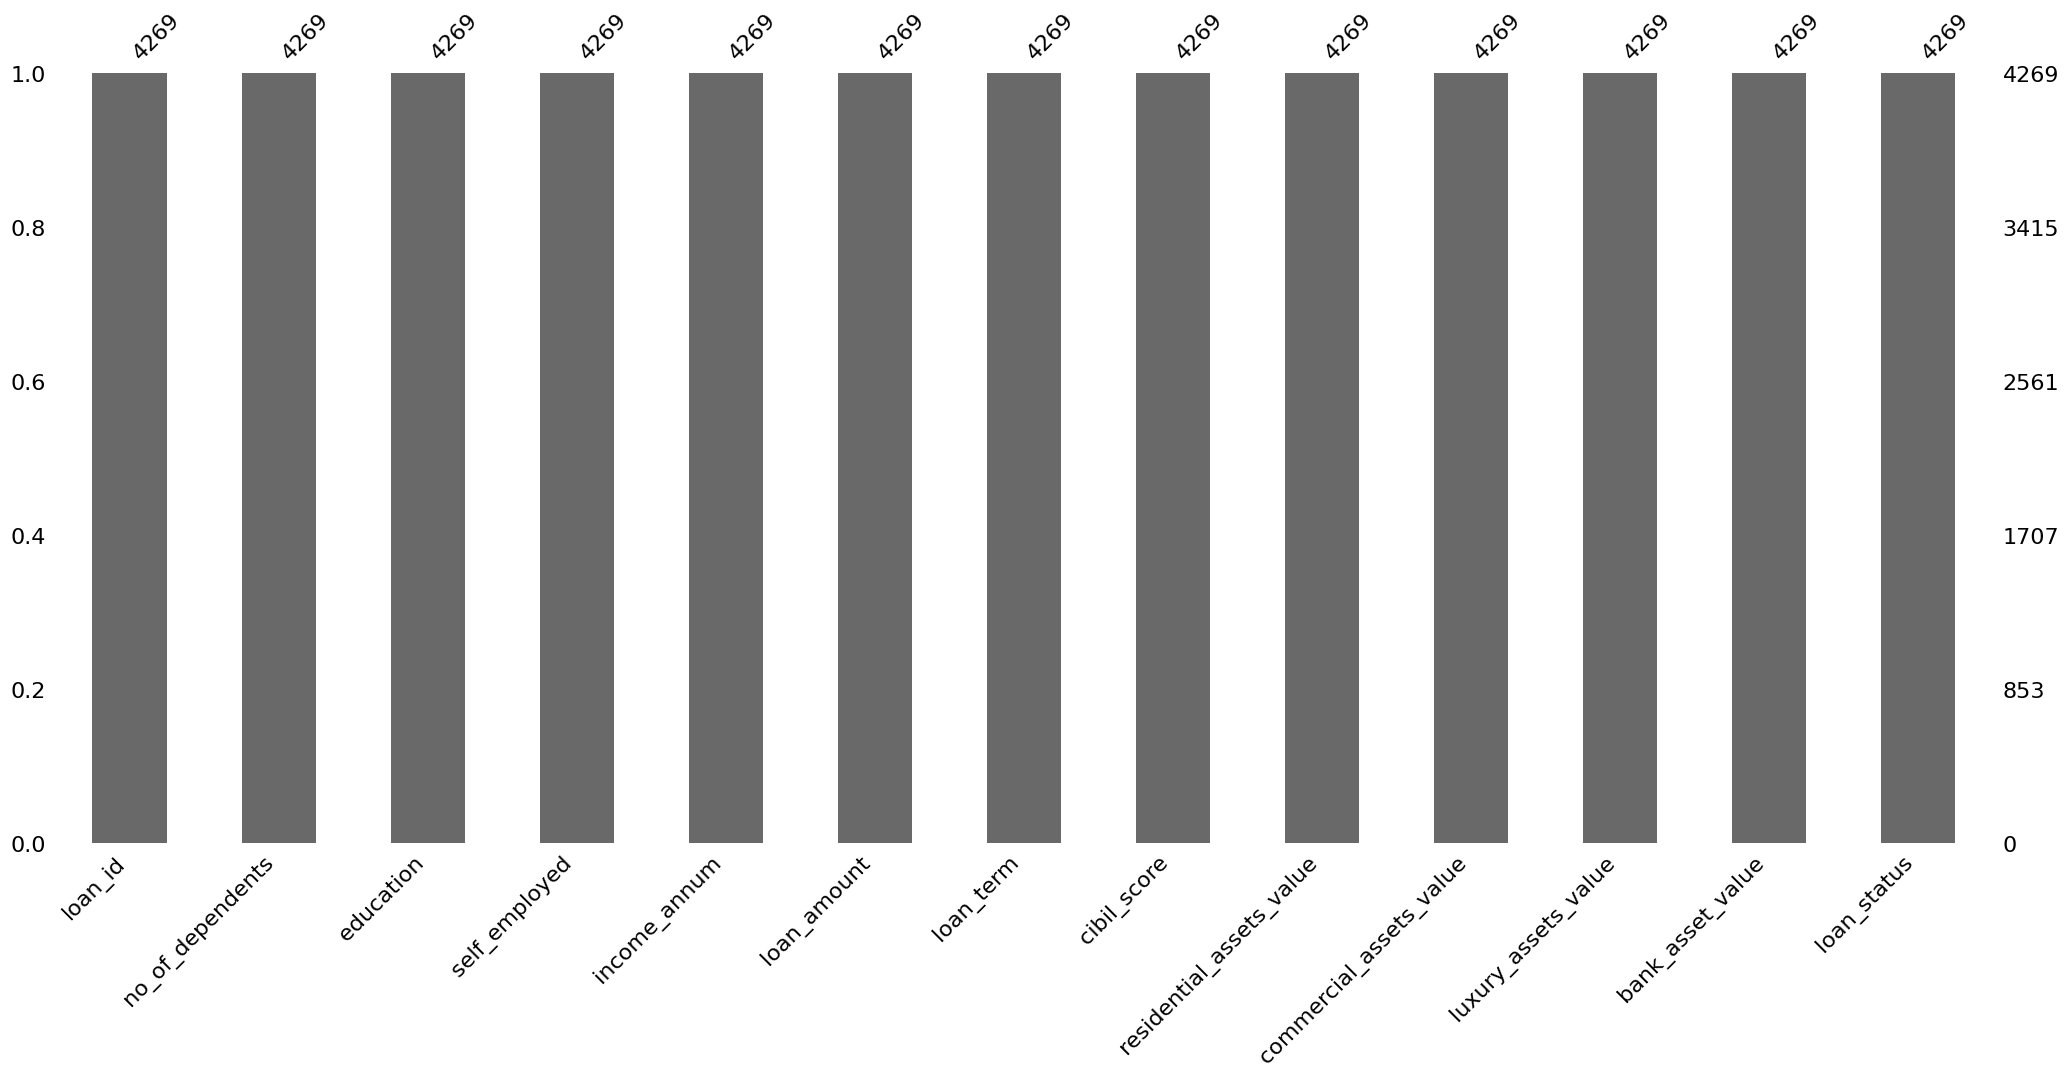

In [5]:
# DADOS FALTANTES
msno.bar(df);

In [6]:
# DADOS DUPLICADOS
df[df.duplicated(keep = "first")]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


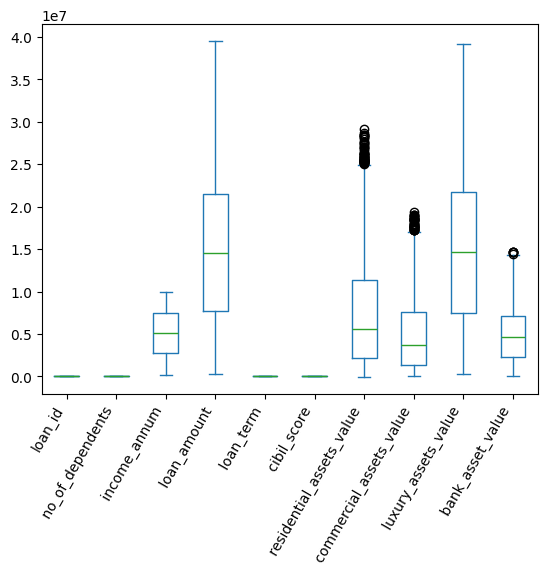

In [7]:
# OUTILIERS
df.plot.box()
plt.xticks(rotation=60, ha='right');

- RESIDENTIAL_ASSETS_VALUE

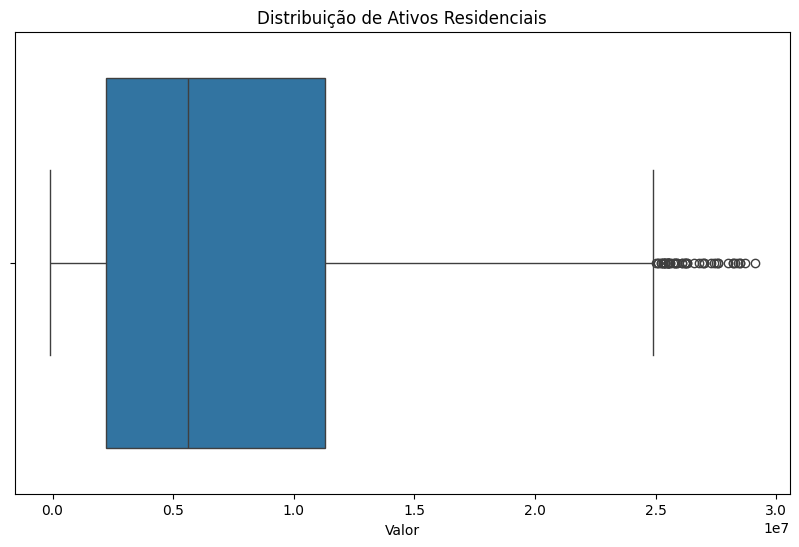

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[" residential_assets_value"])
plt.title('Distribuição de Ativos Residenciais')
plt.xlabel('Valor')
plt.show()

In [9]:
df[df[' residential_assets_value'] < 0]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
59,60,4,Not Graduate,Yes,5500000,18200000,16,797,-100000,4900000,18600000,4800000,Approved
196,197,4,Not Graduate,Yes,400000,1500000,2,669,-100000,600000,900000,500000,Approved
559,560,2,Graduate,Yes,200000,500000,6,885,-100000,0,300000,200000,Rejected
702,703,4,Graduate,Yes,6300000,23900000,6,899,-100000,11400000,20600000,6700000,Approved
737,738,2,Graduate,Yes,900000,2500000,16,458,-100000,100000,3200000,1100000,Rejected
784,785,0,Graduate,No,5000000,14400000,2,761,-100000,7300000,12600000,4500000,Approved
904,905,2,Graduate,No,4100000,14900000,12,571,-100000,5200000,13000000,3400000,Approved
1089,1090,3,Graduate,No,5100000,11000000,6,336,-100000,5800000,11600000,7500000,Rejected
1163,1164,2,Graduate,No,4500000,9100000,18,593,-100000,600000,12400000,2500000,Approved
1350,1351,5,Graduate,No,4000000,13700000,6,496,-100000,1400000,15800000,3700000,Rejected


In [10]:
df[df[' residential_assets_value'] < 0].groupby(" loan_status")[" residential_assets_value"].count()

 loan_status
Approved    16
Rejected    12
Name:  residential_assets_value, dtype: int64

In [11]:
df[df[' residential_assets_value'] > 25000000].sort_values(by = " residential_assets_value", ascending= False)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
3119,3120,4,Not Graduate,No,9800000,29400000,8,592,29100000,16700000,35900000,9000000,Approved
905,906,5,Not Graduate,No,9700000,37000000,14,459,28700000,17900000,22800000,5600000,Rejected
2318,2319,2,Not Graduate,Yes,9600000,29800000,16,499,28500000,6300000,31800000,7400000,Rejected
1591,1592,1,Graduate,No,9500000,23000000,10,627,28500000,11500000,21700000,9100000,Approved
1965,1966,0,Not Graduate,No,9900000,22300000,20,613,28400000,8900000,23600000,4900000,Approved
714,715,4,Not Graduate,No,9900000,22700000,12,567,28300000,9900000,29700000,5400000,Approved
987,988,5,Graduate,No,9400000,25800000,14,625,28200000,15400000,30800000,11100000,Approved
3234,3235,1,Not Graduate,No,9900000,23400000,16,687,28200000,3700000,29600000,8200000,Approved
2586,2587,1,Not Graduate,Yes,9800000,36000000,12,629,28000000,4100000,29800000,11200000,Approved
892,893,4,Graduate,No,9300000,24900000,14,455,27600000,4700000,35100000,13900000,Rejected


In [12]:
df[df[' residential_assets_value'] > 25000000].groupby(" loan_status")[" residential_assets_value"].count()

 loan_status
Approved    33
Rejected    18
Name:  residential_assets_value, dtype: int64

 - commercial_assets_value

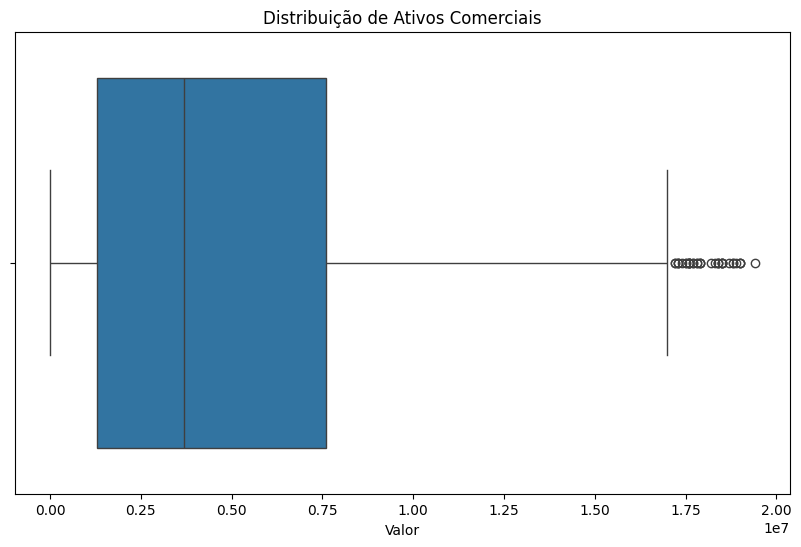

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[" commercial_assets_value"])
plt.title('Distribuição de Ativos Comerciais')
plt.xlabel('Valor')
plt.show()

In [14]:
df[df[' commercial_assets_value'] > 17500000].sort_values(by = " commercial_assets_value", ascending= False)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1768,1769,4,Not Graduate,No,9900000,29100000,18,772,24100000,19400000,26800000,11700000,Approved
1761,1762,2,Not Graduate,Yes,9800000,32700000,2,304,4700000,19000000,24500000,8600000,Approved
258,259,0,Graduate,No,9800000,38800000,8,652,23200000,19000000,29700000,5400000,Approved
2940,2941,1,Graduate,Yes,9600000,34100000,20,828,26100000,19000000,20800000,12400000,Approved
1254,1255,5,Not Graduate,Yes,9800000,35700000,10,726,9400000,18900000,31200000,12000000,Approved
3000,3001,1,Not Graduate,Yes,9900000,25700000,2,340,15600000,18800000,29500000,11800000,Rejected
554,555,3,Not Graduate,Yes,9500000,22800000,6,319,200000,18800000,34100000,9400000,Rejected
157,158,5,Not Graduate,Yes,9900000,33300000,6,364,5300000,18700000,27800000,8300000,Rejected
2914,2915,3,Not Graduate,Yes,9900000,36500000,16,562,17300000,18500000,22300000,9800000,Approved
3882,3883,1,Graduate,Yes,9700000,34300000,20,756,15700000,18500000,26800000,14100000,Approved


In [15]:
df[df[' commercial_assets_value'] > 17500000].groupby(" loan_status")[" commercial_assets_value"].count()

 loan_status
Approved    13
Rejected    16
Name:  commercial_assets_value, dtype: int64

- bank_asset_value

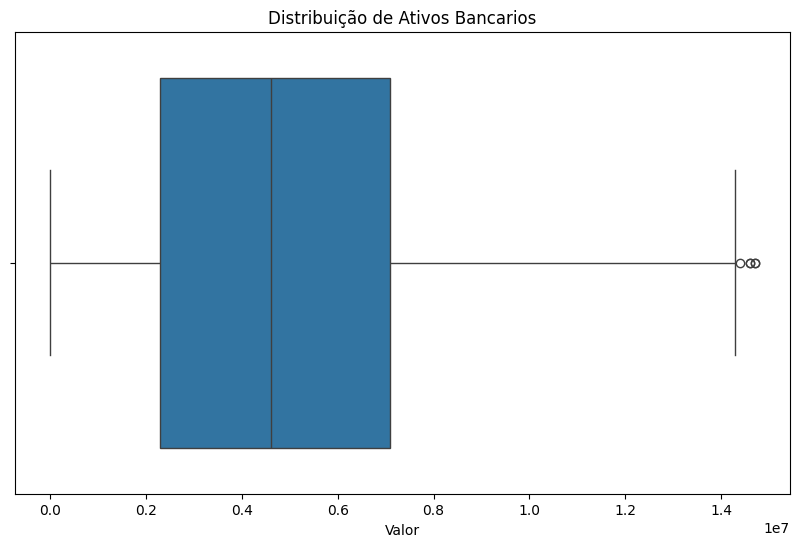

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[" bank_asset_value"])
plt.title('Distribuição de Ativos Bancarios')
plt.xlabel('Valor')
plt.show()

In [17]:
df[df[' bank_asset_value'] > 14500000].sort_values(by = " bank_asset_value", ascending= False)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1272,1273,5,Not Graduate,No,9900000,35800000,20,470,9500000,18400000,39100000,14700000,Rejected
1805,1806,5,Not Graduate,No,9900000,33600000,20,580,7000000,10800000,37400000,14700000,Approved
1633,1634,0,Graduate,Yes,9800000,23200000,10,573,23900000,3300000,23600000,14600000,Approved
1674,1675,1,Not Graduate,No,9800000,21300000,2,356,23000000,12300000,25700000,14600000,Rejected


In [18]:
df[df[' bank_asset_value'] > 14500000].groupby(" loan_status")[" bank_asset_value"].count()

 loan_status
Approved    2
Rejected    2
Name:  bank_asset_value, dtype: int64

- DISTRIBUIÇÃO DAS VARIAVEIS OUTLIERS

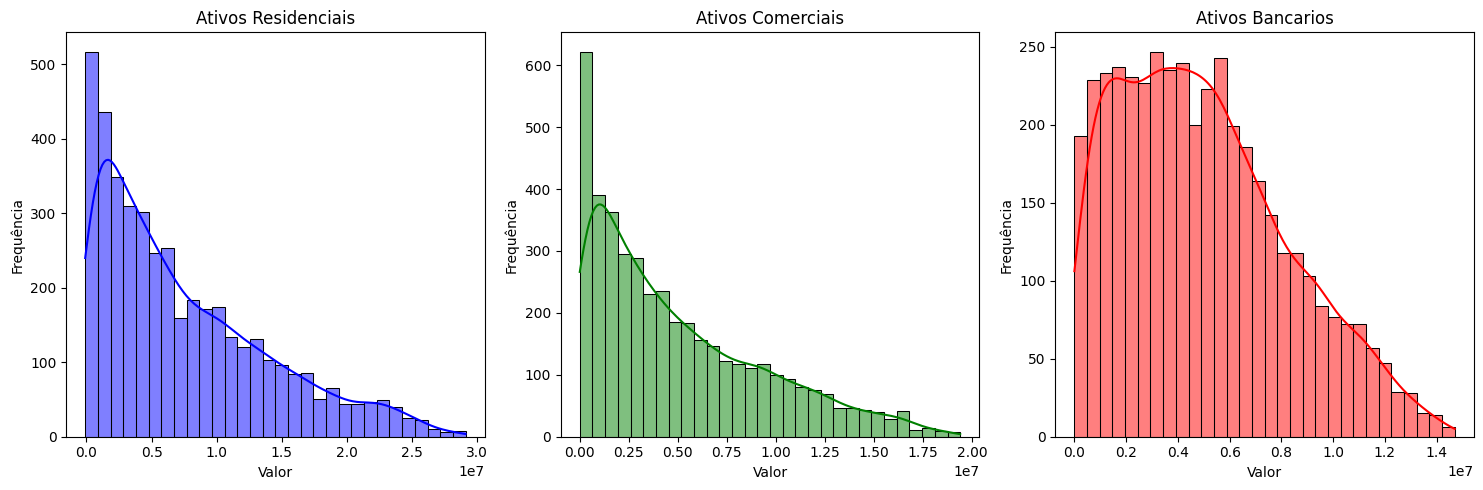

In [19]:
plt.figure(figsize=(15, 5))

# Histograma da primeira variável
plt.subplot(1, 3, 1)
sns.histplot(df[" residential_assets_value"], bins=30, kde=True, color='blue')
plt.title('Ativos Residenciais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Histograma da segunda variável
plt.subplot(1, 3, 2)
sns.histplot(df[" commercial_assets_value"], bins=30, kde=True, color='green')
plt.title('Ativos Comerciais')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Histograma da terceira variável
plt.subplot(1, 3, 3)
sns.histplot(df[" bank_asset_value"], bins=30, kde=True, color='red')
plt.title('Ativos Bancarios')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

- CONSIDERAÇÕES

Plotamos o grafico BoxPlot para fazer a analise dos outliers, dentre as 13 colunas somente as de **ativos residenciais, ativos comerciais a ativos bancarios**, possuem alguns dados fora do padrão, mas por se tratar de patrimonio individual de cada cliente faz sentindo que tenha esses tipos de dados, então a principio vamos manter os dados da maneira que estão e conforme ter interferencia no modelo voltamos para ajustar.

- VARIAVEL TARGET - *Loan status*

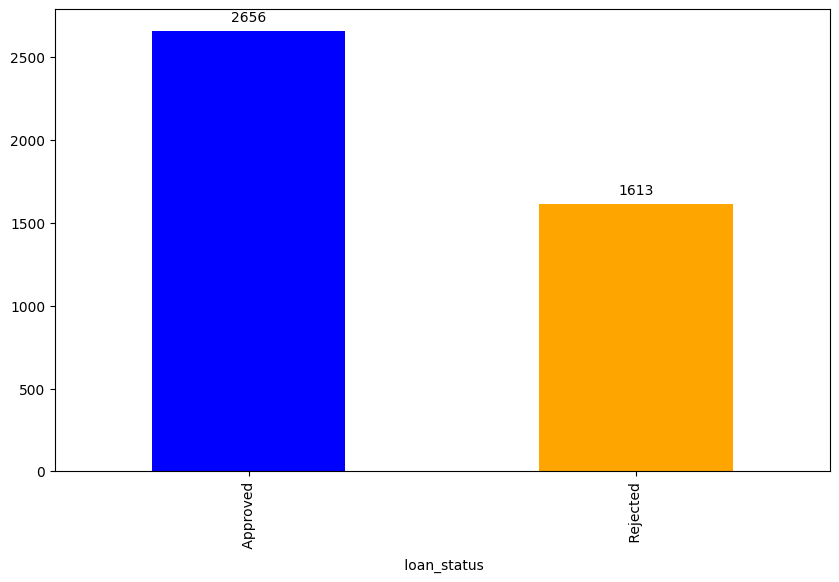

In [20]:
loan_status_isnull = df.loc[~df[' loan_status'].isna()]

plt.figure(figsize=(10, 6))
histograma = loan_status_isnull[" loan_status"].value_counts().plot(kind='bar', color=['blue', 'orange'])

for p in histograma.patches:
    histograma.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

- CONSIDERAÇÕES

Analisamos a variavel target e notamos um desbalanceamento na classe, onde temos um quantidade superior de aprovados em relação aos rejeitados, precisamos utilizar uma tecnica para balancear as classes para que o modelo consiga performar bem.

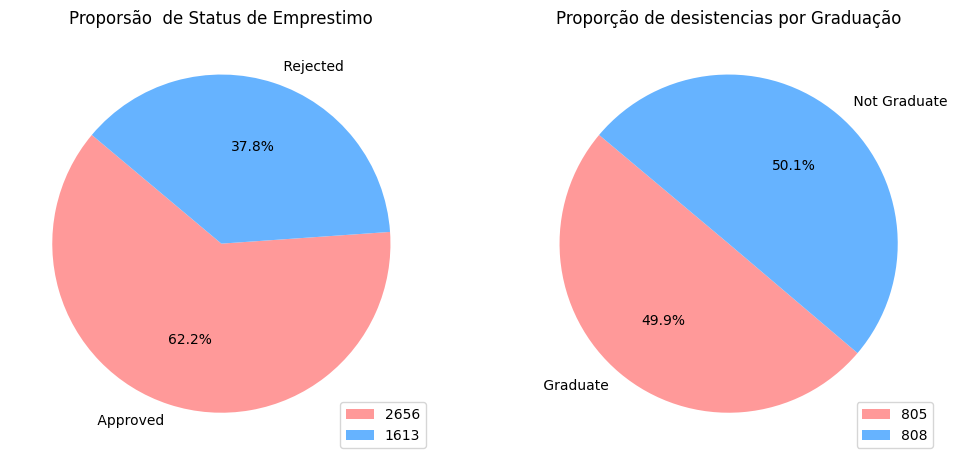

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Grafico - 1

loan_id_plot = df.groupby(" loan_status")["loan_id"].count().reset_index().rename(columns ={" loan_status":"Desistencia","loan_id":"Quantidade"})
loan_id_plot["Desistencia"] = loan_id_plot["Desistencia"].astype(str)

labels = loan_id_plot["Desistencia"]

sizes = loan_id_plot["Quantidade"]

colors = ['#ff9999', '#66b3ff']

axs[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

axs[0].set_title('Proporsão  de Status de Emprestimo', loc="center")
axs[0].title.set_position([.5, 1.05])

axs[0].legend(sizes, loc='lower right')

# Grafico - 2

loan_education = df[df[' loan_status'] == ' Rejected'].groupby(" education")[" loan_status"].count().reset_index().rename(columns = {" loan_status":"Desistencia", " education": "Graduação"})

labels2 = loan_education["Graduação"]

sizes2 = loan_education["Desistencia"]

axs[1].pie(sizes2, labels=labels2, colors=colors, autopct='%1.1f%%', startangle=140)

axs[1].legend(sizes2, loc = "lower right")

axs[1].set_title("Proporção de desistencias por Graduação", loc="center")
axs[1].title.set_position([.5, 1.05])

plt.show()

In [22]:
loan_rejected_dependents = df[df[' loan_status'] == ' Rejected'].groupby(" no_of_dependents")[" loan_status"].count().reset_index()
loan_approved_dependents = df[df[' loan_status'] == ' Approved'].groupby(" no_of_dependents")[" loan_status"].count().reset_index()

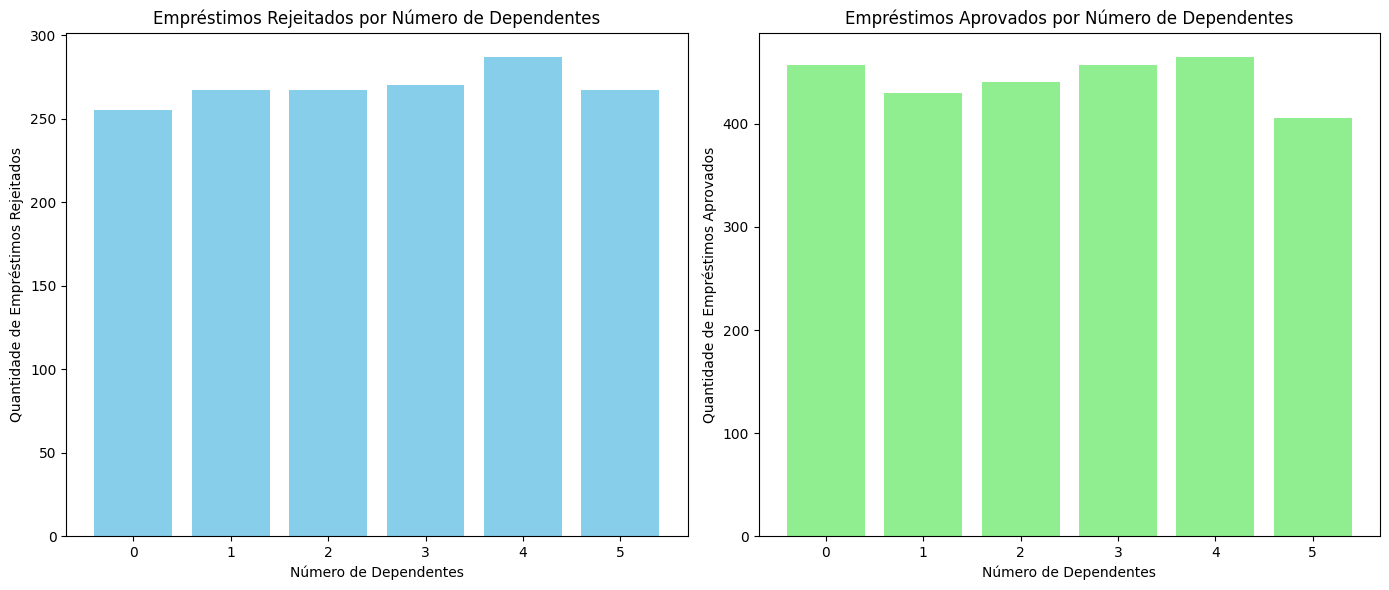

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(loan_rejected_dependents[' no_of_dependents'], loan_rejected_dependents[' loan_status'], color='skyblue')
axes[0].set_xlabel('Número de Dependentes')
axes[0].set_ylabel('Quantidade de Empréstimos Rejeitados')
axes[0].set_title('Empréstimos Rejeitados por Número de Dependentes')
axes[0].set_xticks(loan_rejected_dependents[' no_of_dependents'])

# Plot do gráfico de barras para empréstimos aprovados
axes[1].bar(loan_approved_dependents[' no_of_dependents'], loan_approved_dependents[' loan_status'], color='lightgreen')
axes[1].set_xlabel('Número de Dependentes')
axes[1].set_ylabel('Quantidade de Empréstimos Aprovados')
axes[1].set_title('Empréstimos Aprovados por Número de Dependentes')
axes[1].set_xticks(loan_approved_dependents[' no_of_dependents'])

# Ajustes e exibição
plt.tight_layout()
plt.show()

- CORRELAÇÃO

<Axes: >

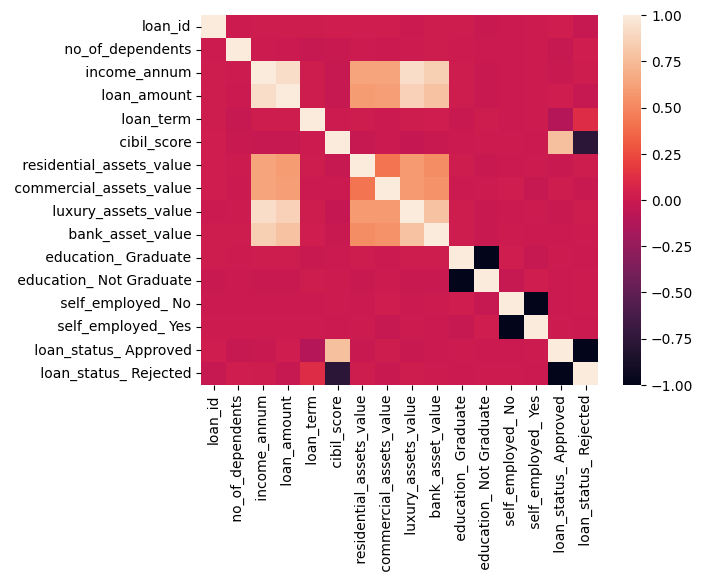

In [24]:
df_norm = pd.get_dummies(df)
sns.heatmap(df_norm.corr())

- CONSIDERAÇÕES

Noteamos que a variavel cibil_score tem relação alta com os emprestimos aprovados e baixa com os emprestimos recusados, isso que a condição de aprovação tem a ver com o score da pessoa. Outro fator notado que o tempo de emprestimos tambem interfere na aprovação, contratos menores tem mais chances de aprovação. A renda mensal e o valor do emprestimo tem relação alta com os ativos do cliente, indicando que o emprestimo tem como objetivo adquirir alguns desses ativos.

**CONCLUSÃO**

 - Concluimos com essa analise exploratoria que temos alguns outliers, mas decidimos não retirar pelo fato de faze sentido para a situação e por eles representarem em media de 1% da base dos dados, nossos dados não possui duplicados e dados faltantes. Olhamos a fundo a variavel target que indentificamos que possui um desbalanceamento de classes, onde temos uma quantidade maior de aprovados em relação os rejeitados, esse é um ponto onde temos que corrigir para nao influenciar no nosso modelo na hora da predição, esse desbalanceamento foi comprovado atraves do grafico de pizza que notamos que quase 63% dos emprestimos solicitados são aprovados. Puxando esse gancho olhamos a fundo mais a outra variaveis em relação a aprovação, no caso da graduação notamos que esta bem equilibrado, algo que tambem foi visto na quantidade de dependentes, dentro dos dois grupos aprovados e reprovados tivemos um equilibrio nos valores. Ja na analise da correlação, assim vimos que o score e o tempo de contrato interfere na variavel target.